In [1]:
#Installing Packages
#In this tutorial we will need to install one more module called matplotlib. 

#We will also be using the module pickle that does not need to be installed.

In [17]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle


import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [18]:
#Loading in Our Data

In [19]:
data = pd.read_csv("student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"

In [20]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [21]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [22]:
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels



In [38]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
    
    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test) # acc stands for accuracy 
    print("Accuracy: " + str(acc))
    
         # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.7616259863540706
Accuracy: 0.8121444307561494
Accuracy: 0.9165067107438264
Accuracy: 0.7460604123824951
Accuracy: 0.7792744312222455
Accuracy: 0.9085791982686082
Accuracy: 0.8522058451184884
Accuracy: 0.7462055657128844
Accuracy: 0.8939522401234155
Accuracy: 0.8619568920051902
Accuracy: 0.8510083357128349
Accuracy: 0.8736033819474814
Accuracy: 0.9363222039330057
Accuracy: 0.8586960481233312
Accuracy: 0.8833349549916903
Accuracy: 0.8572876836160533
Accuracy: 0.8515766262347484
Accuracy: 0.8406798688441118
Accuracy: 0.8808824618921076
Accuracy: 0.8564729762388471


In [25]:
pickle_in = open("studentmodel.pickle", "rb")

In [26]:
#Load the pickle in the linear model

In [27]:
linear= pickle.load(pickle_in)

In [28]:
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

Coefficient: 
 [ 0.13524032  0.97183007 -0.17171599 -0.42392839  0.03602208]
Intercept: 
 -1.1613810000042353


In [29]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print( predictions[x], x_test[x], y_test[x])

8.564525573358102 [ 7 10  3  1  0] 10
15.17328699419731 [15 15  2  0  2] 16
5.4445656559110125 [7 6 1 0 0] 0
7.351750125770083 [8 8 2 0 0] 0
5.181967960448368 [ 6  6  2  1 13] 8
14.03064812396369 [13 14  1  0  0] 14
3.741850892001654 [6 5 2 1 0] 0
5.1530049590001905 [7 7 2 3 5] 7
9.00703460431439 [10  9  3  1 28] 9
12.354081596578547 [10 13  4  0  6] 13
14.966002523323633 [14 15  2  0  0] 16
10.47605681246364 [ 9  9  2  0 56] 8
18.295154487820405 [18 18  4  0  6] 18
11.898795611583175 [14 11  1  0 18] 13
18.45892967533331 [17 18  1  0  0] 18
14.417589384289382 [15 14  2  0  8] 14
9.57473889117241 [ 9 10  2  0  4] 10
8.395624349799608 [8 9 2 0 2] 8
10.672961289297298 [11 11  2  0  0] 10
14.273501077228586 [15 14  2  0  4] 14
4.632277363133242 [8 6 2 2 2] 5
13.085362022617117 [10 13  1  0 12] 12
17.180143299008442 [16 17  2  0  0] 17
12.959146218512505 [13 13  2  0  2] 13
9.701131218798173 [11 10  2  0  0] 10
15.110090830384431 [14 15  2  0  4] 15
11.132342435781725 [12 11  1  1 16] 12
1

In [39]:
#Plotting Our Data

#To get a visual representation of our data we can plot it using the matplotlib library we installed earlier. 
#We are going to use a scatter plot to visualize our data.

No handles with labels found to put in legend.


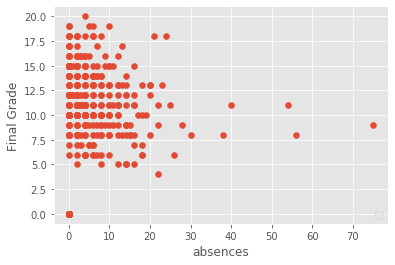

In [45]:
# Drawing and plotting model
plot = "absences" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()